<a href="https://colab.research.google.com/github/JMindpalace/Machine_Learning/blob/main/6.0%20API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# API(Application Programming Interface)
소통 인터페이스(지정된 형식으로 요청, 명령을 받는 수단)

In [ ]:
# API Server의 로드 밸런싱

## API 데이터 받기, DB 저장



---



---



## HTTP(HyperText Transfer Protocol) API

In [ ]:
# 서버 요청 - CRUD(Create, Read, Update, Delete) Method - 개인과 서버의 소통 방법

# Request Method
# GET: 데이터 조회(특정 리소스 요청)
# POST: 데이터 생성(클라이언트에서 서버측으로 정보 전달)
# PUT/PATCH: 데이터(서버측 리소스)업데이트(PUT은 전체, PATCH는 부분적 변경)
# DELETE: 데이터(리소스)삭제

# + MDN HTTP Requests Methods

# 서버 응답(Status Code)
# 100번대: 정보응답, 200번대: 성공, 300번대: 리다이렉션, 400번대: 클라이언트 에러, 500번대: 서버 에러

## REST(REpresentational State of Transfer) API
API가 REST의 6가지 가이드라인을 준수하는지 여부<br>
모두 준수 시 RESTful API라고 함

In [ ]:
# REST에서 사용되는 HTTP (응답) 상태코드
# 200은 성공, 201은 생성, 202는 허용, 204는 연결끊김, 301은 영구 이동

## Open (web) API
공공데이터, 구글/카카오 API

### JSON(Javascript Object Notation)
WEB API 데이터 제공 형식



---



---



## Docker: 서버(다른 어플리케이션)을 실행 환경을 코드로 작성, OS를 격리화하여 관리
1. OS의 일정화
2. 환경 구성
3. 리소스 격리성(포트나 IP 규칙 등)<br>
=> 각 어플리케이션마다 다른 컴퓨터에서 실행되는 것처럼 설정 가능

### Linux Container: 도커-컨테이너의 시작점
> LXC의 구획화: 필요 라이브러리와 어플리케이션을 모아 서버처럼 구성
1. 프로세스: 컨테이너별 독립적이고, 동작은 컨테이너 내에서만 가능함
2. 네트워크: 컨테이너마다 IP주소가 하나 할당됨
3. 파일시스템: 컨테이너 내에서 액세스 제한 가능

### Docker Docs: 필요한 명령어와 옵션

In [ ]:
https://docs.docker.com/engine/reference/commandline/container_run/

### Docker Hub에서 이미지 검색
> 레지스트리 계정/레포지토리 이름: 태그 <br>

> 레지스트리: 도커 이미지 관리 공간, 지정이 없다면 허브를 기본 설정 <br>
> 레포지토리: 레지스트리 내 저장 공간 혹은 이미지 이름<br>
> 태그: 이미지의 버전 정보, latest(미지정 시 사용됨)

In [ ]:
# register/repo Example
1. docker/whalesay:latest
2. danielkraic/asciiquarium:latest

In [ ]:
docker container run --name myName --rm register/repo cowsay command_content
# 컨테이너 일회성으로 실행 후 이미지가 없다면 이미지를 받아온 뒤 모두 실행 후 관련 리소스 삭제

docker image pull register/repo # 이미지 가져오기

docker image ls # 이미지 리스트(내용, 용량) 출력
docker container run --name myName register/repo cowsay command_content
      # 컨테이너 실행, 컨테이너 이름,            옵션 - 컨테이너 cowsay 호출 및 커맨드 전달
docker container run -it # 사용자와 컨테이너 간에 인터렉션이 필요한 경우(지속적 화면 출력을 사용자가 봄 등)
docker container ps -a # 컨테이너 리스트 출력 (-a는 종료까지 포함한 모든 컨테이너 출력)

docker image rm register/repo # 이미지 삭제
docker container rm myNmae # 컨테이너 삭제, ps명령어의 NAMES 혹은 CONTAINER ID로 명시함

### 하나의 Docker 이미지로 컨테이너(Container) 구축
> 웹 서버를 도커-컨테이너로 실행, 구성 파일은 로컬 파일<br>
> 도커-컨테이너의 터미널로 컨테이너의 폴더 구조 파악, 로컬환경과 파일 주고 받기(포트 포워딩)

In [ ]:
# 로컬 파일과 도커 이미지 연결 - 1. CP(Copy): 호스트와 컨테이너 사이에 파일 복사

# httpd(http daemon): 해당 경로에 저장된 파일을 기반으로 Apache HTTP Server를실행
git clone https://github.com/codestates/pacman-canvas # 관련 파일 불러오기
docker container run --name my_web --rm -p 818:80 httpd # httpd로 로컬 818과 컨테이너 80 포토를 연결
docker container cp ./ my_web:/usr/local/apache2/htdocs/ # 로컬 파일을 Apache서버와 컨테이너에 전달
127.0.0.1:818 혹은 localhost:818로 작동 확인

# Docker 컨테이너를 이미지로 만들기: 이전 작업을 묶어 배포 및 관리가 유용
# 1. commit
docker container commit my_web my_pacman:1.0 # 이름:버전
docker run --name my_web2 -p 900:80 my_pacman:1.0 # 900포트에서 웹서버 구동

# 2. Dockerfile: 이미지 파일의 설명서(file을 만들고 이미지를 build하는 법)
# https://docs.docker.com/engine/reference/builder/
FROM httpd:2.4 # 베이스 이미지를 httpd:2.4로 사용
COPY ./ /usr/local/apache2/htdocs/ # 현재 경로의 이미지 파일을 복사
docker build --tag my_pacman:2.0 # 도커파일에 이미지 파일 생성
docker run --name my_web3 -p 901:80 my_pacman:2.0

In [ ]:
# 로컬 파일과 도커 이미지 연결 - 2. Docker Volume 기능: 호스트와 컨테이너 사이에 공간을 마운트
# 마운트: 다른 장치에서 접근할 수 있도록 경로를 허용해서 하나의 저장공간처럼 이용함

https://ko.wikipedia.org/wiki/%EB%B3%BC%EB%A5%A8_(%EC%BB%B4%ED%93%A8%ED%8C%85)
https://www.joinc.co.kr/w/man/12/docker/Guide/DataWithContainer

### 두 개 이상의 Docker container로 컨테이너 구축
> Docker-Compose로 여러 docker container 실행, Yaml 문법

### Docker LifeCycle

### 추가 학습
1. Dockerfile에 사용되는 문법, 원하는 도커-이미지 제작 후 베포
2. Docker 네트워크를 활용하여 여러 개의 컨테이너에 연결하고 활용
3. Docker와 Linux 컨테이너 관계 설명
4. Kubernetes와 컨테이너 표준 사이의 관계
5. 가상머신(virtualbox, VMware)을 이해하고 Docker와 비교하여 설명

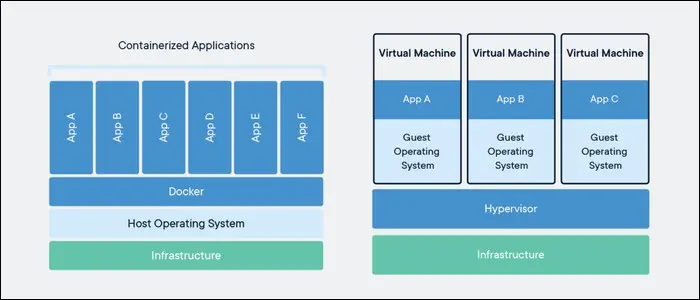



---



---



## 웹 어플리케이션: 웹 프레임워크

In [ ]:
Static에 css 파일 필수
templates에 html 파일 필수

### Postman
### 라우팅
### 블루프린터

### Flask, Flask 서버
> 웹 프레임워크: 어플리케이션 개발을 위한 웹 서비스나 API를 제공하여 개발과 베포를 지원하는 도구 모음

In [ ]:
pip install flask # Flask 설치
touch __init__.py # 기본 패키지 알림 파일 생성

In [ ]:
# py파일에 코드
from flask import Flask

app = Flask(__name__) # 어플리케이션 이름 지정

# 라우트 데코레이터(@) - GET, HEAD, OPTIONS로 HTTP Request 메서드 허용
# methods인자로 POST, PUT, PATCH, DELETE 등도 사용 가능, @app.route('/', methods=['POST',])
@app.route('/') # 기본 주소의 끝(엔드포인트) 설정, 서브엔드포인트의 /는 다른 포인트를 가르킴
def index():    # URL에 따른 실행 함수
    return 'basic code seeing'

@app.route('/index/', defaults={ 'num' : 0 }) # 세부 엔드 포인트 기본값
@app.route('/index/<num>') # 세부 엔드 포인트: 주소에서 값 전달 가능
def index_a(num):
    return f'Welcome to Index {num}' # 기본 문자열, 숫자의 경우 int(num) 혹은 <int:num>

In [ ]:
# 블루프린트: 기능별로 라우트를 분리
from flask_app.routes import user_routes

app.register_blueprint(user_routes.bp) # 블루프린트 사용

In [ ]:
# Application Factory: 순환참조(circular import), 다수 어플 동시 사용, app파일 일부분만 사용 시 제약 사항 해결
def create_app():
    app = Flask(__name__)

    from yourapplication.views.admin import admin
    from yourapplication.views.frontend import frontend
    app.register_blueprint(admin)
    app.register_blueprint(frontend)

    return app

if __name__ == "__main__":
  app = create_app()
  app.run()

In [ ]:
# bash에서 CLI로 실행
# 상위 디렉토리에서 FLASK_APP=flask_app flask run으로 실행
# 반환되는 http 주소로 접속(flask는 기본 5000포트를 사용함)

#### Jinja 템플릿: Flask의 패키지로 HTML 파일을 클라이언트에게 제공
> Werkzeug, Flask-SQLAlchemy: Flask 패키지와 라이브러리

In [ ]:
# Flask HTML 렌더링
# 1. 파이썬 코드에서 직접 HTML 리턴
@app.route('/')
def index():
  return ''' <html> <head> <body> </body> </head> </html> '''

# 2. Flask의 render_template 메서드로 html파일 불러오기 - templates 폴더를 기준으로 경로 설정
from flask import render_template

@app.route('/')
def index():
  return render_template('index.html') # templates폴더에 index.html파일이 있음

In [ ]:
# Jinja -- 웹 템플릿 엔진(Web Template Engine): 맞춤형 웹페이지를 자동 생산
# 추가 기능 - https://jinja.palletsprojects.com/en/2.11.x/templates/#variables

<body>의 <태그> 사이에 {중괄호}를 사용하여 렌더링
1. {{ -- }} # 객체 태그, 템플릿 결과(html)에 출력할 표현
main py 인수 전달
stirng = {'abc':'영어', '가나다':'한글'} # 문자열, 딕셔너리, 리스트 등 가능
number = 10
  return render_template('index.html', html_s = string.abc, html_n = number)

html 파일 인수 받기
<h2> print string {{ html_s }} </h2>
<h2> print numbering {{ html_n }} </h2>


2. {% -- %} # if, for 등 구문에 사용
{% if True %}
<h1> if ture content </h1>
{% elif False %}
<h1> if false content </h1>
{% else %}
<h1> all false content </h1>
{% endif %}

{% for i in list %}
<p> {{ i }} , 반복순서(index면 1부터 1씩, index0이면 0부터 1씩): {{ loop.index }},
반복순서가 처음이면 ture: {{ loop.first }}, 반복순서가 마지막이면 true: {{ loop.last }} </p>
{% endfor %}

3. {# -- #} # 주석 처리

In [ ]:
# 상속
{% extends "상속 받을 문서.html" %} # 첫 줄에 위치, 상속 시 모든 내용 상속됨
{% block 상속 받을 변수 %} 상속 받아 변경할 내용 {% endblock %}
# 변경 내용을 작성하면, 부모 블록에 새로 덮어씀, {{ super() }}로 부모 블록 출력 가능

In [ ]:
# app.run(debug=True) # Flask 재실행 없이 실시간 반영 가능

#### Bootstrap: HTML 헤더에 CSS 혹은 Javascript를 추가하여 동작
> 추가적인 기능은 body에 컴포넌트를 추가하여 사용<br>
> https://getbootstrap.com/docs/5.0/components/accordion/